# Synchronization stability of simplicial complexes generated from scale-free and small-world networks

This code was used for the analysis presented in  
"Do higher-order interactions promote synchronization?"  
by Yuanzhao Zhang, Maxime Lucas, and Federico Battiston

In [3]:
from pathlib import Path

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sb
from labellines import labelLines
from tqdm import tqdm

import xgi
from utils import (
    compute_eigenvalues_multi,
    flag_complex_d2,
)

sb.set_theme(style="ticks", context="paper")

fig_dir = "figures/"
results_dir = "results/"

Path(fig_dir).mkdir(parents=True, exist_ok=True)
Path(results_dir).mkdir(parents=True, exist_ok=True)

## Fig S4: BA structures

In [31]:
N = 300
M = [20, 40, 60, 80]

BASs = []

# generate structures
for j, m in enumerate(tqdm(M)):

    # generate BA graphs:
    # A graph of N nodes is grown by attaching new nodes each with m edges
    # that are preferentially attached to existing nodes with high degree.
    barabasi_albert = nx.barabasi_albert_graph(N, m, seed=42)

    # generate maximum simplicial complex
    MSC = flag_complex_d2(barabasi_albert)

    BASs.append(MSC)

100%|████████████████████████████████████████████████████████| 4/4 [1:05:56<00:00, 989.19s/it]


In [32]:
alphas = np.arange(0, 1.01, 0.05)

lyaps_BASs = np.zeros((len(M), len(alphas), N))

# compute Lyapunov exponents
for j, S in enumerate(tqdm(BASs)):

    for i, alpha in enumerate(alphas):

        lyap_multi = compute_eigenvalues_multi(
            S, orders=[1, 2], weights=[1 - alpha, alpha]
        )

        lyap_multi = np.sort(lyap_multi)[::-1]
        lyaps_BASs[j, i, :] = lyap_multi

100%|███████████████████████████████████████████████████████████| 4/4 [02:26<00:00, 36.55s/it]


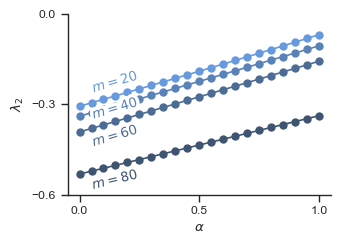

In [67]:
fig, ax = plt.subplots(figsize=(3.4, 2.35))

palette = sb.dark_palette("#69d", reverse=True)
sb.set_palette(palette)

for i, m in enumerate(M):
    ax.plot(alphas, lyaps_BASs[i, :, 1], "o-", label=f"$m={m:.0f}$", ms=5)

ax.set_ylabel(r"$\lambda_2$")
ax.set_xlabel(r"$\alpha$")

ax.set_yticks([-0.0, -0.3, -0.6])
ax.set_xticks([0, 0.5, 1])

xvals = [0.15] * 4
offsets = [0.045, -0.01, -0.049, -0.049]
labelLines(
    plt.gca().get_lines(), align=True, xvals=xvals, yoffsets=offsets, outline_width=5
)

sb.despine()

fig_name = f"figure_S4_MSC_barabasi_albert"
plt.savefig(f"{fig_dir}{fig_name}.pdf", dpi=250, bbox_inches="tight")

plt.show()

## Fig S5: WS structures

In [22]:
N = 300  # Size of the graph
M = [
    30,
    50,
    70,
    90,
]  # Each node is joined with its m nearest neighbors in a ring topology
p = 0.15  # The probability of rewiring each edge

WSs = []

# generate structures
for j, m in enumerate(tqdm(M)):

    # generate SW graphs
    watts_strogatz = nx.watts_strogatz_graph(N, m, p)

    # generate maximum simplicial complex
    MSC = flag_complex_d2(watts_strogatz)

    WSs.append(MSC)

100%|██████████████████████████████████████████████████████████| 4/4 [23:26<00:00, 351.74s/it]


In [23]:
alphas = np.arange(0, 1.01, 0.05)

lyaps_WS = np.zeros((len(M), len(alphas), N))

# compute Lyapunov exponents
for j, S in enumerate(tqdm(WSs)):

    for i, alpha in enumerate(alphas):

        lyap_multi = compute_eigenvalues_multi(
            S, orders=[1, 2], weights=[1 - alpha, alpha]
        )

        lyap_multi = np.sort(lyap_multi)[::-1]
        lyaps_WS[j, i, :] = lyap_multi

100%|███████████████████████████████████████████████████████████| 4/4 [01:18<00:00, 19.71s/it]


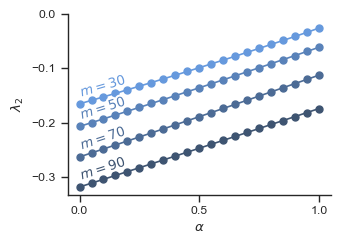

In [30]:
fig, ax = plt.subplots(figsize=(3.4, 2.35))

palette = sb.dark_palette("#69d", reverse=True)
sb.set_palette(palette)

for i, m in enumerate(M):
    ax.plot(alphas, lyaps_WS[i, :, 1], "o-", label=f"$m={m:.0f}$", ms=5)

ax.set_ylabel(r"$\lambda_2$")
ax.set_xlabel(r"$\alpha$")

ax.set_yticks([-0.0, -0.1, -0.2, -0.3])
ax.set_xticks([0, 0.5, 1])

xvals = [0.1] * 4
labelLines(
    plt.gca().get_lines(), align=True, xvals=xvals, yoffsets=0.019, outline_width=3
)

sb.despine()

fig_name = f"fig_S5_MSC_watts_strogatz"
plt.savefig(f"{fig_dir}{fig_name}.pdf", dpi=250, bbox_inches="tight")

plt.show()